In [7]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)

In [8]:
df = pd.read_csv("../data/post-operative-data.csv")
df.head()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A


In [9]:
df.shape

(90, 9)

In [10]:
df.columns

Index(['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL',
       'COMFORT', 'decision ADM-DECS'],
      dtype='str')

In [11]:
df['decision ADM-DECS'].value_counts()

decision ADM-DECS
A     63
S     24
I      2
A      1
Name: count, dtype: int64

In [12]:
df['decision ADM-DECS'] = df['decision ADM-DECS'].str.strip()


In [13]:
df = df[df['decision ADM-DECS'].isin(['A', 'S'])]

In [14]:
df['decision ADM-DECS'].value_counts()

decision ADM-DECS
A    64
S    24
Name: count, dtype: int64

In [15]:
list(df.columns)

['L-CORE',
 'L-SURF',
 'L-O2',
 'L-BP',
 'SURF-STBL',
 'CORE-STBL',
 'BP-STBL',
 'COMFORT',
 'decision ADM-DECS']

In [16]:
df = df.rename(columns={"decision ADM-DECS": "decision"})

In [17]:
df.columns

Index(['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL',
       'COMFORT', 'decision'],
      dtype='str')

In [18]:
df.columns = (
    df.columns
    .str.lower()
    .str.replace("-", "_")
    .str.strip()
)

In [19]:
df.columns

Index(['l_core', 'l_surf', 'l_o2', 'l_bp', 'surf_stbl', 'core_stbl', 'bp_stbl',
       'comfort', 'decision'],
      dtype='str')

In [20]:
for col in df.columns:
    print(col, "->", sorted(df[col].unique()))


l_core -> ['high', 'low', 'mid']
l_surf -> ['high', 'low', 'mid']
l_o2 -> ['excellent', 'good']
l_bp -> ['high', 'low', 'mid']
surf_stbl -> ['stable', 'unstable']
core_stbl -> ['mod-stable', 'stable', 'unstable']
bp_stbl -> ['mod-stable', 'stable', 'unstable']
comfort -> ['10', '15', '5', '7', '?']
decision -> ['A', 'S']


In [21]:
df['comfort'] = df['comfort'].replace('?', np.nan)
df['comfort'] = df['comfort'].astype(float)
df['comfort'] = df['comfort'].fillna(df['comfort'].median())

In [22]:
for col in df.columns:
    print(col, "->", sorted(df[col].unique()))


l_core -> ['high', 'low', 'mid']
l_surf -> ['high', 'low', 'mid']
l_o2 -> ['excellent', 'good']
l_bp -> ['high', 'low', 'mid']
surf_stbl -> ['stable', 'unstable']
core_stbl -> ['mod-stable', 'stable', 'unstable']
bp_stbl -> ['mod-stable', 'stable', 'unstable']
comfort -> [np.float64(5.0), np.float64(7.0), np.float64(10.0), np.float64(15.0)]
decision -> ['A', 'S']


In [23]:
df['decision'] = df['decision'].map({
    'A': 1,  #risky
    'S': 0   #risk-free
})

In [24]:
df['decision'].value_counts()

decision
1    64
0    24
Name: count, dtype: int64

In [25]:
severity_map = {'low': 0, 'mid': 1, 'high': 2}
o2_map = {'good': 0, 'excellent': 1}
stability_map = {'unstable': 0, 'mod-stable': 1, 'stable': 2}
binary_stability_map = {'unstable': 0, 'stable': 1}

In [26]:
df['l_core'] = df['l_core'].map(severity_map)
df['l_surf'] = df['l_surf'].map(severity_map)
df['l_bp'] = df['l_bp'].map(severity_map)

df['l_o2'] = df['l_o2'].map(o2_map)

df['surf_stbl'] = df['surf_stbl'].map(binary_stability_map)
df['core_stbl'] = df['core_stbl'].map(stability_map)
df['bp_stbl'] = df['bp_stbl'].map(stability_map)

In [27]:
df.head()
df.isna().sum()

l_core       0
l_surf       0
l_o2         0
l_bp         0
surf_stbl    0
core_stbl    0
bp_stbl      0
comfort      0
decision     0
dtype: int64

In [28]:
X = df.drop('decision', axis=1)
y = df['decision']


In [29]:
X.shape, y.shape


((88, 8), (88,))

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [31]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)


decision
1    0.722222
0    0.277778
Name: proportion, dtype: float64

In [32]:
X.shape
y.shape
y.value_counts()


decision
1    64
0    24
Name: count, dtype: int64

In [33]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)


decision
1    0.722222
0    0.277778
Name: proportion, dtype: float64

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    class_weight='balanced', 
    random_state=42
)

model.fit(X_train_scaled, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [36]:
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.20      0.40      0.27         5
           1       0.62      0.38      0.48        13

    accuracy                           0.39        18
   macro avg       0.41      0.39      0.37        18
weighted avg       0.51      0.39      0.42        18



In [37]:
y_proba = model.predict_proba(X_test_scaled)[:, 1]

y_pred_custom = (y_proba >= 0.3).astype(int)


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, y_pred_custom)
print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.73      0.85      0.79        13

    accuracy                           0.67        18
   macro avg       0.53      0.52      0.52        18
weighted avg       0.62      0.67      0.64        18



In [39]:
import pandas as pd

importance = pd.Series(
    model.coef_[0],
    index=X.columns
).sort_values(ascending=False)

importance


l_o2         0.236912
l_surf       0.210179
l_bp         0.158959
comfort      0.124500
core_stbl    0.115711
surf_stbl   -0.117587
l_core      -0.243130
bp_stbl     -0.563342
dtype: float64

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=3,         
    min_samples_leaf=5,   
    random_state=42
)

dt.fit(X_train, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [41]:
from sklearn.metrics import classification_report

y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.71      0.77      0.74        13

    accuracy                           0.61        18
   macro avg       0.48      0.48      0.48        18
weighted avg       0.59      0.61      0.60        18



In [42]:
import pandas as pd

importance = pd.Series(
    dt.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance


l_surf       0.358009
l_bp         0.301615
bp_stbl      0.267794
l_o2         0.072581
l_core       0.000000
surf_stbl    0.000000
core_stbl    0.000000
comfort      0.000000
dtype: float64

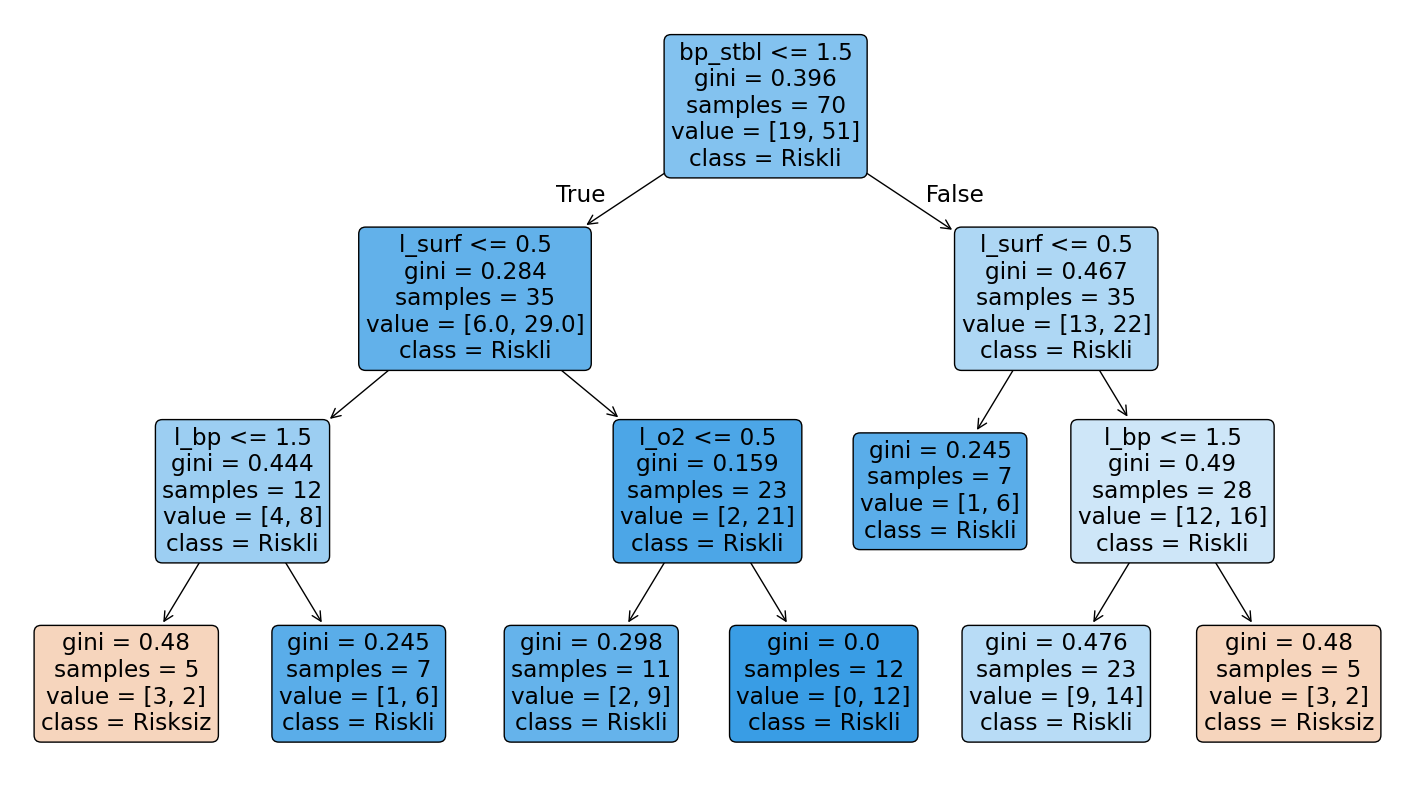

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["Risksiz", "Riskli"],
    filled=True,
    rounded=True
)
plt.show()


In [44]:
normal_abnormal_map = {
    "low": 1,
    "mid": 0,
    "high": 1
}

df["l_core"] = df["l_core"].map(normal_abnormal_map)
df["l_surf"] = df["l_surf"].map(normal_abnormal_map)
df["l_bp"] = df["l_bp"].map(normal_abnormal_map)


In [45]:
df["l_o2"] = df["l_o2"].map({
    "excellent": 0,
    "good": 1
})

In [46]:
stability_map = {
    "stable": 0,
    "mod-stable": 1,
    "unstable": 2
}

df["surf_stbl"] = df["surf_stbl"].map(stability_map)
df["core_stbl"] = df["core_stbl"].map(stability_map)
df["bp_stbl"] = df["bp_stbl"].map(stability_map)

In [47]:
dt_clinical = DecisionTreeClassifier(
    max_depth=3,
    min_samples_leaf=5,
    random_state=42
)

dt_clinical.fit(X_train, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [48]:
from sklearn.metrics import classification_report

y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.71      0.77      0.74        13

    accuracy                           0.61        18
   macro avg       0.48      0.48      0.48        18
weighted avg       0.59      0.61      0.60        18



In [49]:
import pandas as pd

importance = pd.Series(
    dt.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance


l_surf       0.358009
l_bp         0.301615
bp_stbl      0.267794
l_o2         0.072581
l_core       0.000000
surf_stbl    0.000000
core_stbl    0.000000
comfort      0.000000
dtype: float64

In [50]:
normal_abnormal_map = {
    "mid": 0,    # normal
    "low": 1,    # anormal
    "high": 1    # anormal
}


In [51]:
for col in ["l_core", "l_surf", "l_bp"]:
    df[col] = df[col].map(normal_abnormal_map)


In [52]:
df["l_o2"] = df["l_o2"].map({
    "excellent": 0,
    "good": 1
})


In [53]:
stability_map = {
    "stable": 0,
    "mod-stable": 1,
    "unstable": 2
}

for col in ["surf_stbl", "core_stbl", "bp_stbl"]:
    df[col] = df[col].map(stability_map)


In [54]:
X = df.drop("decision", axis=1)
y = df["decision"]

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [56]:
from sklearn.tree import DecisionTreeClassifier

dt_clinical = DecisionTreeClassifier(
    max_depth=3,
    min_samples_leaf=5,
    random_state=42
)

dt_clinical.fit(X_train, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [57]:
from sklearn.metrics import classification_report

y_pred = dt_clinical.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.72      1.00      0.84        13

    accuracy                           0.72        18
   macro avg       0.36      0.50      0.42        18
weighted avg       0.52      0.72      0.61        18



/Users/busra/postoperative-risk-prediction/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/busra/postoperative-risk-prediction/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/busra/postoperative-risk-prediction/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

In [58]:
import pandas as pd

importance = pd.Series(
    dt_clinical.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance


comfort      1.0
l_core       0.0
l_surf       0.0
l_o2         0.0
l_bp         0.0
surf_stbl    0.0
core_stbl    0.0
bp_stbl      0.0
dtype: float64

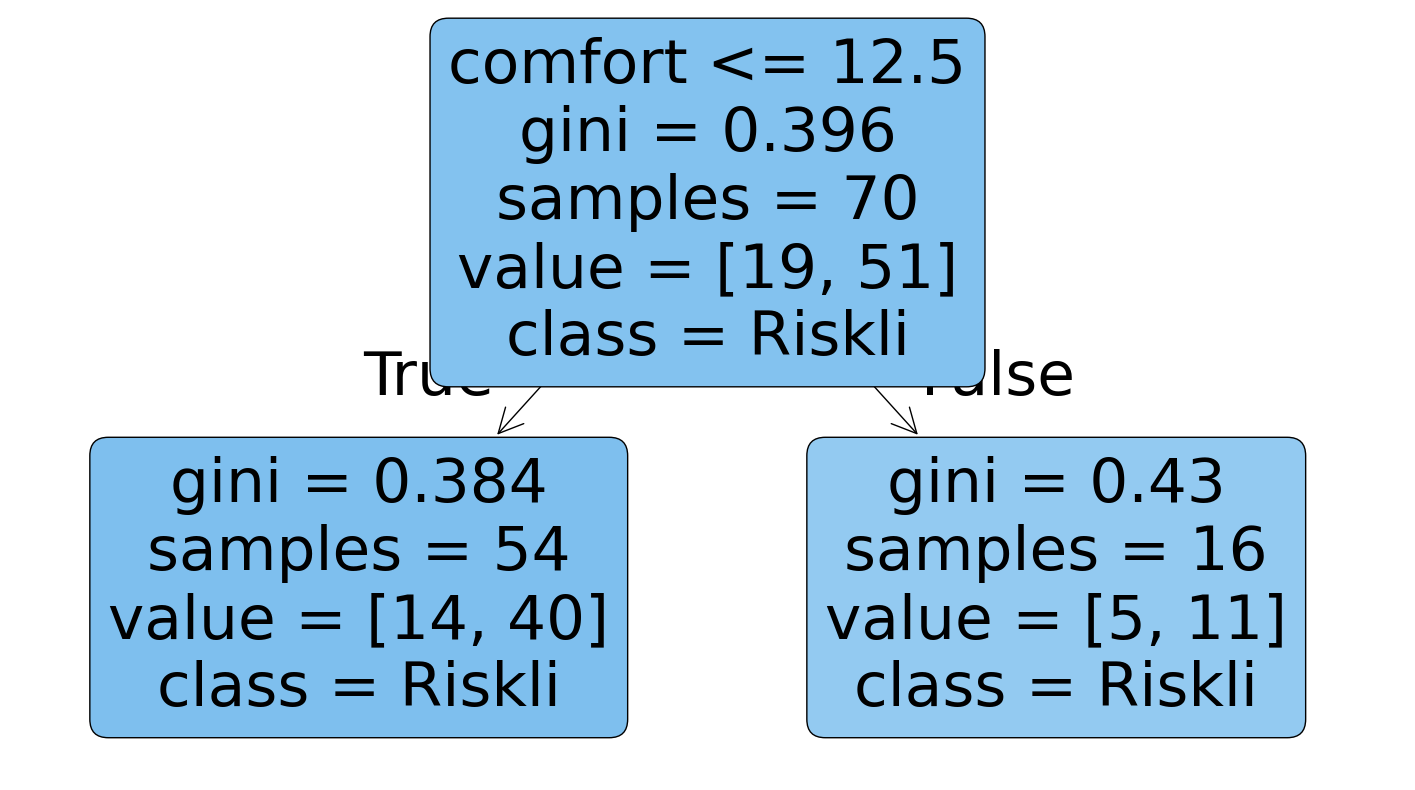

In [59]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
plot_tree(
    dt_clinical,
    feature_names=X.columns,
    class_names=["Risksiz", "Riskli"],
    filled=True,
    rounded=True
)
plt.show()


In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=4,
    min_samples_leaf=5,
    random_state=42
)

rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [61]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.72      1.00      0.84        13

    accuracy                           0.72        18
   macro avg       0.36      0.50      0.42        18
weighted avg       0.52      0.72      0.61        18



/Users/busra/postoperative-risk-prediction/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/busra/postoperative-risk-prediction/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/busra/postoperative-risk-prediction/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

In [62]:
rf_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

rf_importance


comfort      1.0
l_core       0.0
l_surf       0.0
l_o2         0.0
l_bp         0.0
surf_stbl    0.0
core_stbl    0.0
bp_stbl      0.0
dtype: float64

In [63]:

level_map = {"mid": 0, "low": 1, "high": 1}
df["l_core"] = df["l_core"].map(level_map)
df["l_surf"] = df["l_surf"].map(level_map)
df["l_bp"] = df["l_bp"].map(level_map)

o2_map = {"excellent": 0, "good": 1}
df["l_o2"] = df["l_o2"].map(o2_map)


stability_map = {"stable": 0, "mod-stable": 1, "unstable": 2}
for col in ["core_stbl", "surf_stbl", "bp_stbl"]:
    df[col] = df[col].map(stability_map)


df["decision"] = df["decision"].map({"S": 0, "A": 1})


In [74]:
X = df.drop("decision", axis=1)
y = df["decision"]
